## Importação das bibliotecas

In [2]:
#Importação das bilbiotecas, sklearn para criar o modelo de regressão e yellowbrick para vizualização de residuais
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt


## Carregamento da base de dados

In [3]:
#carregamento da base de dados
dados = pd.read_csv('dados_tcc_primeira_versao_CD.csv', delimiter=';')
dados.shape

(825, 18)

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   OCORRENCIA_ANO_BAIRRO          825 non-null    int64  
 1   CD_BAIRRO                      825 non-null    int64  
 2   NOM_BAIRRO                     825 non-null    object 
 3   TOT_EQUIP_BAIRRO               825 non-null    int64  
 4   FLAG_EQUIPAMENTO_BAIRRO        825 non-null    int64  
 5   FLAGRANTE_BAIRRO               825 non-null    int64  
 6   TOT_OPERACAO_BAIRRO            825 non-null    int64  
 7   TOT_OCORR_BAIRRO               825 non-null    int64  
 8   RENDI_NOM_MED_TOTAL            825 non-null    float64
 9   RENDI_NOM_MED_HOMENS           825 non-null    float64
 10  RENDI_NOM_MED_MULHERES         825 non-null    float64
 11  POP_DENSIDADE_2022             825 non-null    float64
 12  TOTAL_ALVARAS                  825 non-null    int

In [5]:
#vizualização dos dados
dados.columns
dados.head()

,OCORRENCIA_ANO_BAIRRO,CD_BAIRRO,NOM_BAIRRO,TOT_EQUIP_BAIRRO,FLAG_EQUIPAMENTO_BAIRRO,FLAGRANTE_BAIRRO,TOT_OPERACAO_BAIRRO,TOT_OCORR_BAIRRO,RENDI_NOM_MED_TOTAL,RENDI_NOM_MED_HOMENS,RENDI_NOM_MED_MULHERES,POP_DENSIDADE_2022,TOTAL_ALVARAS,ARE_VERDE_POR_HAB,CD_REGIONAL,NOM_REGIONAL,TOT_OCORR_REGIONAL,QTD_EQUIPAMENTOS_GMC_REGIONAL
0,2012,50,ABRANCHES,9,52,2,1,255524,1709.45,2042.91,1342.33,13132.64,2699,28.6,4,REGIONAL BOA VISTA,4492796,5
1,2013,50,ABRANCHES,9,31,3,17,231495,1709.45,2042.91,1342.33,13132.64,2699,28.6,4,REGIONAL BOA VISTA,5680685,5
2,2014,50,ABRANCHES,9,40,11,121,310156,1709.45,2042.91,1342.33,13132.64,2699,28.6,4,REGIONAL BOA VISTA,5022916,5
3,2015,50,ABRANCHES,9,43,10,149,300235,1709.45,2042.91,1342.33,13132.64,2699,28.6,4,REGIONAL BOA VISTA,5365945,5
4,2016,50,ABRANCHES,9,38,7,118,237888,1709.45,2042.91,1342.33,13132.64,2699,28.6,4,REGIONAL BOA VISTA,4550111,5


In [6]:
# Dicionário de dados
# OCORRENCIA_ANO_BAIRRO
# ATENDIMENTO_BAIRRO
# TOT_POP_BAIRRO
# RENDIMENTO_NOMINAL_MEDIO 
# TOTAL_ALVARAS
# TOT_EQUIP_BAIRRO
# TOT_OCORR_BAIRRO
# FLAG_EQUIPAMENTO_BAIRRO
# FLAGRANTE_BAIRRO
# TOT_OPERACAO_BAIRRO
# REGIONAL
# TOT_OCORR_REGIONAL
# QTD_EQUIPAMENTOS_GMC_REGIONAL
# QTD_GMC_ATUAL_REGIONAL
# QTD_GMC_IDEAL_REGIONAL
# AREA_BAIRROS_KM 
# AREAS_VERDES_BAIRROS_KM

In [7]:
# Estatísticas básicas
dados.describe()

,OCORRENCIA_ANO_BAIRRO,CD_BAIRRO,TOT_EQUIP_BAIRRO,FLAG_EQUIPAMENTO_BAIRRO,FLAGRANTE_BAIRRO,TOT_OPERACAO_BAIRRO,TOT_OCORR_BAIRRO,RENDI_NOM_MED_TOTAL,RENDI_NOM_MED_HOMENS,RENDI_NOM_MED_MULHERES,POP_DENSIDADE_2022,TOTAL_ALVARAS,ARE_VERDE_POR_HAB,CD_REGIONAL,TOT_OCORR_REGIONAL,QTD_EQUIPAMENTOS_GMC_REGIONAL
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,8.250000e+02,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,8.250000e+02,825.000000
mean,2017.000000,38.000000,15.586667,151.785455,19.889697,383.435152,3.386252e+05,2406.356933,2959.198291,1847.425370,8302.969733,6440.213333,205.053467,4.695758,5.371662e+06,4.853333
std,3.164196,21.661843,21.719752,222.997625,57.705426,853.067556,7.825069e+05,1223.176793,1617.055644,873.231654,10488.877306,6813.156769,499.943468,3.152406,1.949374e+07,2.607693
min,2012.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,854.890000,990.760000,675.550000,58.190000,38.000000,4.040000,1.000000,1.131300e+04,1.000000
25%,2014.000000,19.000000,4.000000,30.000000,3.000000,54.000000,3.170000e+02,1471.800000,1737.260000,1175.590000,1288.820000,2340.000000,20.120000,2.000000,2.678900e+04,3.000000
50%,2017.000000,38.000000,9.000000,79.000000,6.000000,163.000000,5.834800e+04,1902.940000,2310.250000,1528.200000,4083.550000,4220.000000,38.370000,4.000000,3.041636e+06,5.000000
75%,2020.000000,57.000000,18.000000,161.000000,17.000000,392.000000,3.791960e+05,3062.900000,3783.950000,2355.070000,13130.840000,9270.000000,143.150000,7.000000,4.545598e+06,5.000000
max,2022.000000,75.000000,145.000000,1597.000000,807.000000,10640.000000,7.896894e+06,6187.410000,8271.700000,4290.790000,60315.140000,41184.000000,3620.030000,12.000000,1.995922e+08,9.000000


## 3. Definição das Variáveis:

In [10]:
y =  dados['TOT_OCORR_BAIRRO']
X = dados[['TOT_EQUIP_BAIRRO','FLAG_EQUIPAMENTO_BAIRRO','FLAGRANTE_BAIRRO','TOT_OPERACAO_BAIRRO','RENDI_NOM_MED_TOTAL',
'RENDI_NOM_MED_HOMENS','RENDI_NOM_MED_MULHERES','POP_DENSIDADE_2022','TOTAL_ALVARAS','ARE_VERDE_POR_HAB','CD_REGIONAL',
'TOT_OCORR_REGIONAL','QTD_EQUIPAMENTOS_GMC_REGIONAL']]  

## 4. Verificação dos Pressupostos:

### 4.1 Linearidade

#### **Gráfico de Dispersão:**

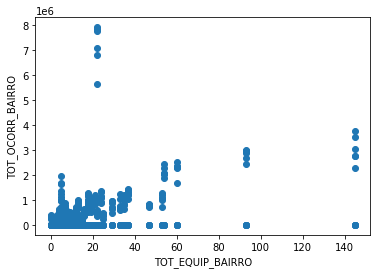

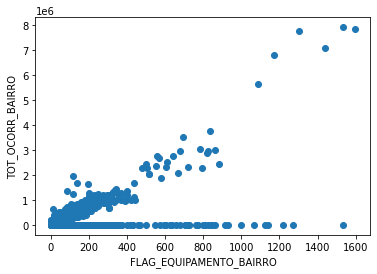

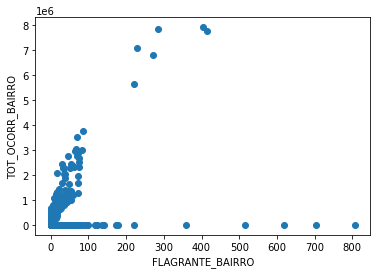

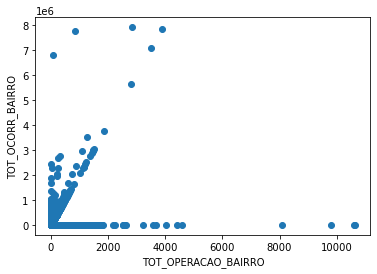

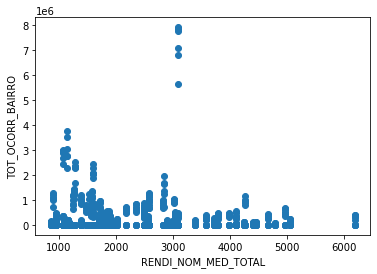

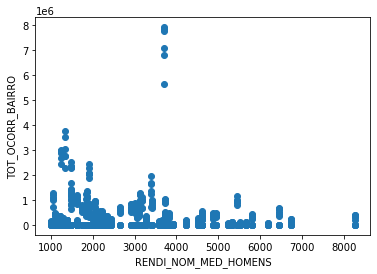

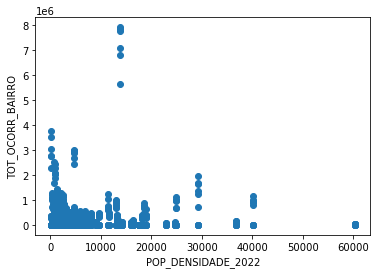

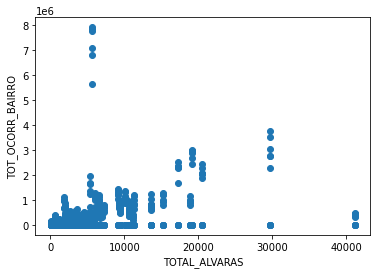

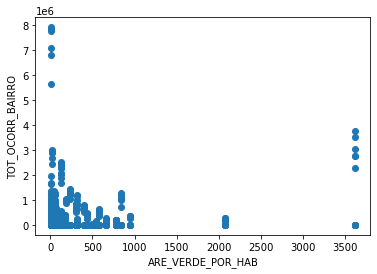

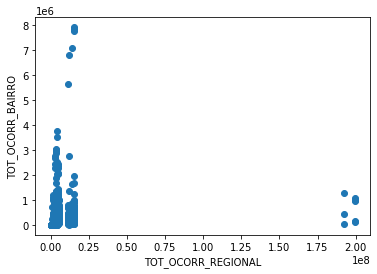

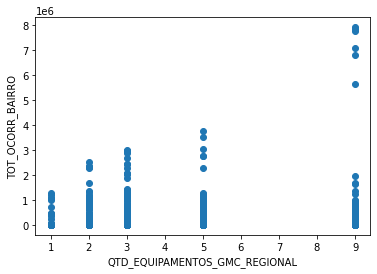

In [11]:
plt.scatter(X['TOT_EQUIP_BAIRRO'], y)
plt.xlabel('TOT_EQUIP_BAIRRO')
plt.ylabel('TOT_OCORR_BAIRRO')
plt.show()

plt.scatter(X['FLAG_EQUIPAMENTO_BAIRRO'], y)
plt.xlabel('FLAG_EQUIPAMENTO_BAIRRO')
plt.ylabel('TOT_OCORR_BAIRRO')
plt.show()

plt.scatter(X['FLAGRANTE_BAIRRO'], y)
plt.xlabel('FLAGRANTE_BAIRRO')
plt.ylabel('TOT_OCORR_BAIRRO')
plt.show()

plt.scatter(X['TOT_OPERACAO_BAIRRO'], y)
plt.xlabel('TOT_OPERACAO_BAIRRO')
plt.ylabel('TOT_OCORR_BAIRRO')
plt.show()

plt.scatter(X['RENDI_NOM_MED_TOTAL'], y)
plt.xlabel('RENDI_NOM_MED_TOTAL')
plt.ylabel('TOT_OCORR_BAIRRO')
plt.show()

plt.scatter(X['RENDI_NOM_MED_HOMENS'], y)
plt.xlabel('RENDI_NOM_MED_HOMENS')
plt.ylabel('TOT_OCORR_BAIRRO')
plt.show()

plt.scatter(X['POP_DENSIDADE_2022'], y)
plt.xlabel('POP_DENSIDADE_2022')
plt.ylabel('TOT_OCORR_BAIRRO')
plt.show()

plt.scatter(X['TOTAL_ALVARAS'], y)
plt.xlabel('TOTAL_ALVARAS')
plt.ylabel('TOT_OCORR_BAIRRO')
plt.show()

plt.scatter(X['ARE_VERDE_POR_HAB'], y)
plt.xlabel('ARE_VERDE_POR_HAB')
plt.ylabel('TOT_OCORR_BAIRRO')
plt.show()

plt.scatter(X['TOT_OCORR_REGIONAL'], y)
plt.xlabel('TOT_OCORR_REGIONAL')
plt.ylabel('TOT_OCORR_BAIRRO')
plt.show()

plt.scatter(X['QTD_EQUIPAMENTOS_GMC_REGIONAL'], y)
plt.xlabel('QTD_EQUIPAMENTOS_GMC_REGIONAL')
plt.ylabel('TOT_OCORR_BAIRRO')
plt.show()

#### **Coeficiente de Correlação:**

In [12]:
corr = stats.pearsonr(X['TOT_EQUIP_BAIRRO'], y)
print("Coeficiente de Correlação de 'TOT_EQUIP_BAIRRO':", corr[0])

corr = stats.pearsonr(X['FLAG_EQUIPAMENTO_BAIRRO'], y)
print("Coeficiente de Correlação de 'FLAG_EQUIPAMENTO_BAIRRO':", corr[0])

corr = stats.pearsonr(X['FLAGRANTE_BAIRRO'], y)
print("Coeficiente de Correlação de 'FLAGRANTE_BAIRRO':", corr[0])

corr = stats.pearsonr(X['TOT_OPERACAO_BAIRRO'], y)
print("Coeficiente de Correlação de 'TOT_OPERACAO_BAIRRO':", corr[0])

corr = stats.pearsonr(X['RENDI_NOM_MED_TOTAL'], y)
print("Coeficiente de Correlação de ,'RENDI_NOM_MED_TOTAL':", corr[0])

corr = stats.pearsonr(X['RENDI_NOM_MED_HOMENS'], y)
print("Coeficiente de Correlação de ,'RENDI_NOM_MED_HOMENS':", corr[0])

corr = stats.pearsonr(X['RENDI_NOM_MED_MULHERES'], y)
print("Coeficiente de Correlação de ,'RENDI_NOM_MED_MULHERES':", corr[0])

corr = stats.pearsonr(X['POP_DENSIDADE_2022'], y)
print("Coeficiente de Correlação de ,'POP_DENSIDADE_2022':", corr[0])

corr = stats.pearsonr(X['TOTAL_ALVARAS'], y)
print("Coeficiente de Correlação de ,'TOTAL_ALVARAS':", corr[0])

corr = stats.pearsonr(X['ARE_VERDE_POR_HAB'], y)
print("Coeficiente de Correlação de ,'ARE_VERDE_POR_HAB':", corr[0]) 

corr = stats.pearsonr(X['TOT_OCORR_REGIONAL'], y) 
print("Coeficiente de Correlação de ,'TOT_OCORR_REGIONAL':", corr[0]) 

corr = stats.pearsonr(X['QTD_EQUIPAMENTOS_GMC_REGIONAL'], y) 
print("Coeficiente de Correlação de ,'QTD_EQUIPAMENTOS_GMC_REGIONAL':", corr[0])

Coeficiente de Correlação de 'TOT_EQUIP_BAIRRO': 0.37637678359608895
Coeficiente de Correlação de 'FLAG_EQUIPAMENTO_BAIRRO': 0.6082928485117679
Coeficiente de Correlação de 'FLAGRANTE_BAIRRO': 0.3899279596421331
Coeficiente de Correlação de 'TOT_OPERACAO_BAIRRO': 0.17141513008985076
Coeficiente de Correlação de ,'RENDI_NOM_MED_TOTAL': -0.06936216182207203
Coeficiente de Correlação de ,'RENDI_NOM_MED_HOMENS': -0.07459467453058849
Coeficiente de Correlação de ,'RENDI_NOM_MED_MULHERES': -0.0508891722231721
Coeficiente de Correlação de ,'POP_DENSIDADE_2022': -0.0315306648165964
Coeficiente de Correlação de ,'TOTAL_ALVARAS': 0.26663462494019174
Coeficiente de Correlação de ,'ARE_VERDE_POR_HAB': 0.12377710293383694
Coeficiente de Correlação de ,'TOT_OCORR_REGIONAL': 0.11585750759981858
Coeficiente de Correlação de ,'QTD_EQUIPAMENTOS_GMC_REGIONAL': 0.04074473932336754


#### Matriz de correlação

In [13]:
# Assuming 'dados' is your original data
corr_matrix = dados.corr()  # Calculate correlation using pandas

# Convert non-numeric columns (if any)
for col in corr_matrix:
    try:
        corr_matrix[col] = pd.to_numeric(corr_matrix[col], errors='coerce')  # Convert to numeric or NaN
    except:
        pass  # Skip columns that cannot be converted

# Check data types using `corr_matrix.dtypes`


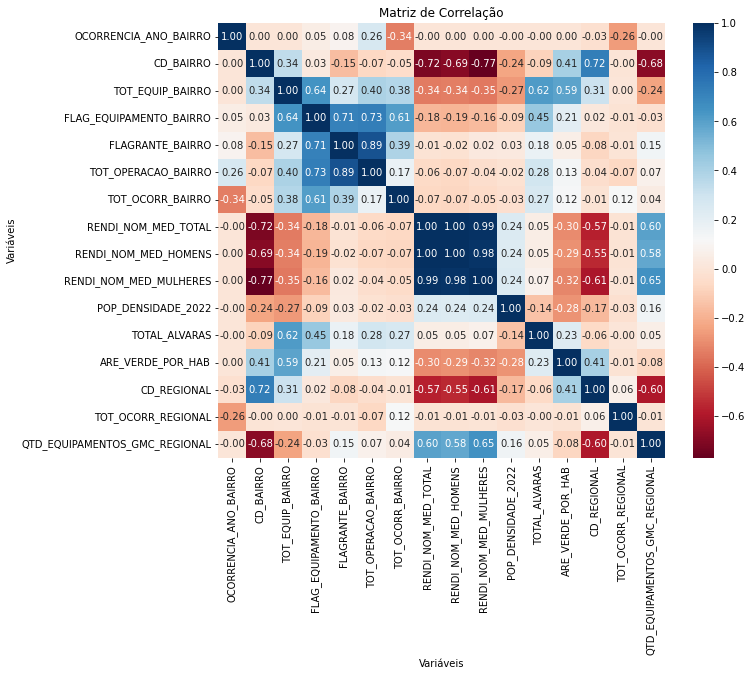

In [14]:
import seaborn as sns

# Assuming the corrected corr_matrix
plt.figure(figsize=(10, 8))  # Increase figure size

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='RdBu')  # Customize formatting
plt.title('Matriz de Correlação')
plt.xlabel('Variáveis')
plt.ylabel('Variáveis')

plt.show()


### 4.2 Normalidade 

#### **Histograma dos Resíduos:**

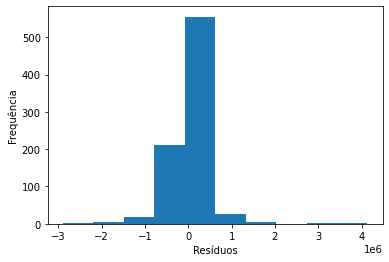

In [15]:
modelo = sm.OLS(y, X).fit()
residuos = modelo.resid
plt.hist(residuos)
plt.xlabel("Resíduos")
plt.ylabel("Frequência")
plt.show()


 #### Teste de Normalidade:

In [17]:
shapiro_test = stats.shapiro(residuos)
print("Teste de Shapiro-Wilk:", shapiro_test)


Teste de Shapiro-Wilk: ShapiroResult(statistic=0.7024116516113281, pvalue=8.92038782691026e-36)


### 4.3 Heterocedasticidade:

#### **Gráfico de Resíduos vs. Variáveis ​​Preditoras:**

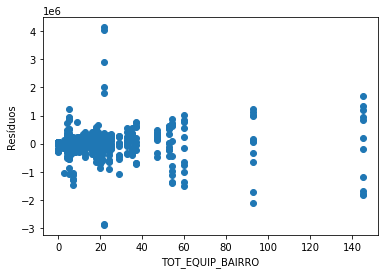

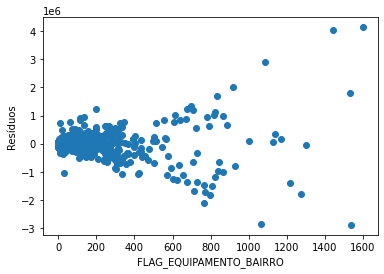

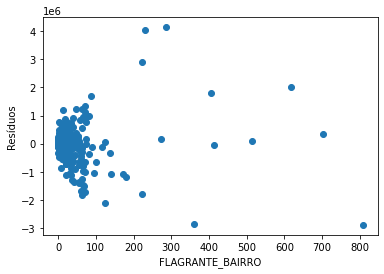

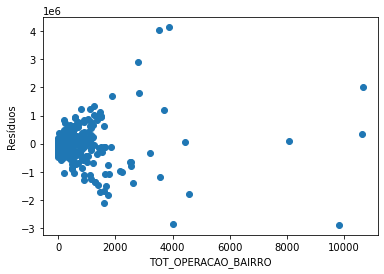

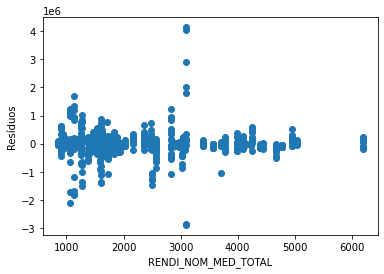

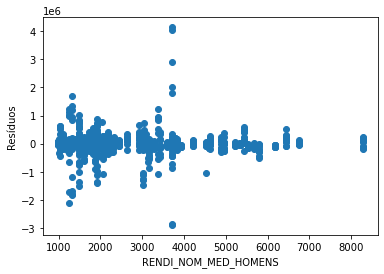

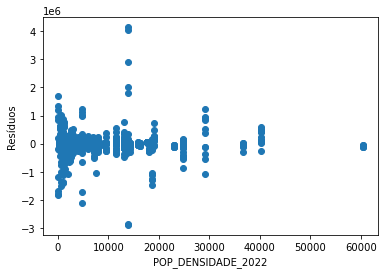

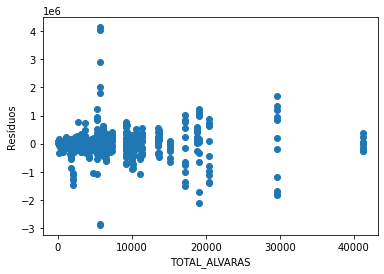

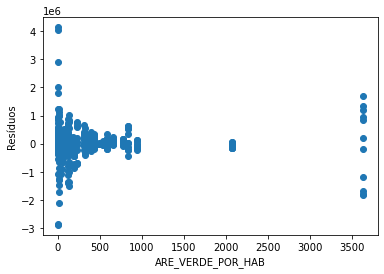

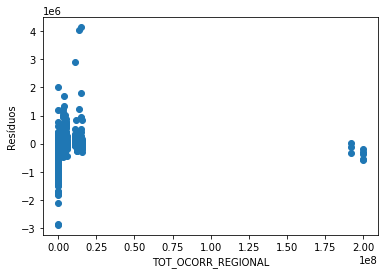

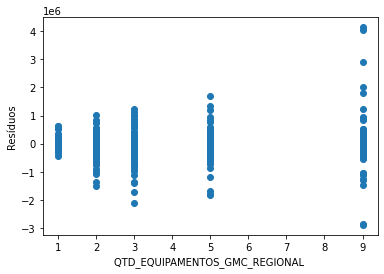

In [18]:
plt.scatter(X['TOT_EQUIP_BAIRRO'], residuos)
plt.xlabel( 'TOT_EQUIP_BAIRRO')
plt.ylabel("Resíduos")
plt.show()

plt.scatter(X['FLAG_EQUIPAMENTO_BAIRRO'], residuos)
plt.xlabel( 'FLAG_EQUIPAMENTO_BAIRRO' )
plt.ylabel("Resíduos")
plt.show()

plt.scatter(X['FLAGRANTE_BAIRRO'], residuos)
plt.xlabel(  'FLAGRANTE_BAIRRO')
plt.ylabel("Resíduos")
plt.show()

plt.scatter(X['TOT_OPERACAO_BAIRRO'], residuos)
plt.xlabel('TOT_OPERACAO_BAIRRO')
plt.ylabel("Resíduos")
plt.show()

plt.scatter(X['RENDI_NOM_MED_TOTAL'], residuos)
plt.xlabel('RENDI_NOM_MED_TOTAL')
plt.ylabel("Resíduos")
plt.show()

plt.scatter(X['RENDI_NOM_MED_HOMENS'], residuos)
plt.xlabel('RENDI_NOM_MED_HOMENS')
plt.ylabel("Resíduos")
plt.show()

plt.scatter(X['POP_DENSIDADE_2022'], residuos)
plt.xlabel('POP_DENSIDADE_2022')
plt.ylabel("Resíduos")
plt.show()

plt.scatter(X['TOTAL_ALVARAS'], residuos)
plt.xlabel('TOTAL_ALVARAS')
plt.ylabel("Resíduos")
plt.show()

plt.scatter(X['ARE_VERDE_POR_HAB'], residuos)
plt.xlabel('ARE_VERDE_POR_HAB')
plt.ylabel("Resíduos")
plt.show()

plt.scatter(X['TOT_OCORR_REGIONAL'], residuos)
plt.xlabel('TOT_OCORR_REGIONAL')
plt.ylabel("Resíduos")
plt.show()

plt.scatter(X['QTD_EQUIPAMENTOS_GMC_REGIONAL'], residuos)
plt.xlabel('QTD_EQUIPAMENTOS_GMC_REGIONAL ')
plt.ylabel("Resíduos")
plt.show()

#### Teste de Breusch-Pagan

In [19]:
from statsmodels.stats.diagnostic import het_breuschpagan

modelo = sm.OLS(y, X).fit()
bp_test = het_breuschpagan(modelo.resid, X)

print("Teste de Breusch-Pagan:", bp_test)


Teste de Breusch-Pagan: (382.2420374790775, 2.1677451763179755e-74, 53.924328293673526, 2.1834570243613309e-100)


### 4.4 Multicolineariedade

#### **Fator de Inflação da Variância (VIF):**

In [28]:

# Import the vif function from the correct submodule
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Get column names from the original X (assuming it's a DataFrame)
column_names = X.columns

# Access explanatory variables using 'model.exog'
vif = [variance_inflation_factor(modelo.model.exog, i) for i in range(len(column_names))]

# Print the VIF for each variable
for i in range(len(vif)):
    print(f"VIF para {column_names[i]}: {vif[i]}")



VIF para TOT_EQUIP_BAIRRO: 6.946041489408426
VIF para FLAG_EQUIPAMENTO_BAIRRO: 5.925911396637597
VIF para FLAGRANTE_BAIRRO: 6.701569411469931
VIF para TOT_OPERACAO_BAIRRO: 6.567331857497183
VIF para RENDI_NOM_MED_TOTAL: 2423.2615435366156
VIF para RENDI_NOM_MED_HOMENS: 1221.5694074334685
VIF para RENDI_NOM_MED_MULHERES: 494.18645827424365
VIF para POP_DENSIDADE_2022: 1.8515164122442744
VIF para TOTAL_ALVARAS: 3.9886221108162454
VIF para ARE_VERDE_POR_HAB: 2.524158779029314
VIF para CD_REGIONAL: 3.0084011338426406
VIF para TOT_OCORR_REGIONAL: 1.1091753301719458
VIF para QTD_EQUIPAMENTOS_GMC_REGIONAL: 11.525695248987626


## 5. Estimação dos Parâmetros:

In [29]:
modelo = sm.OLS(y, X).fit()

## 6. Análise da Significância dos Parâmetros:



### 6.1. Teste t de Student:

In [30]:
for i in range(len(modelo.params)):
    t_test = stats.ttest_ind(y, X[X.columns[i]])
    print(f"Parâmetro {X.columns[i]}:")
    print(f"Valor p: {t_test.pvalue}")


Parâmetro TOT_EQUIP_BAIRRO:
Valor p: 5.745693144240305e-34
Parâmetro FLAG_EQUIPAMENTO_BAIRRO:
Valor p: 6.083749105271576e-34
Parâmetro FLAGRANTE_BAIRRO:
Valor p: 5.75608310587008e-34
Parâmetro TOT_OPERACAO_BAIRRO:
Valor p: 6.705202591759999e-34
Parâmetro RENDI_NOM_MED_TOTAL:
Valor p: 1.5632267527466018e-33
Parâmetro RENDI_NOM_MED_HOMENS:
Valor p: 1.968868757995597e-33
Parâmetro RENDI_NOM_MED_MULHERES:
Valor p: 1.2376729268091249e-33
Parâmetro POP_DENSIDADE_2022:
Valor p: 1.82123084947053e-32
Parâmetro TOTAL_ALVARAS:
Valor p: 8.390349461201035e-33
Parâmetro ARE_VERDE_POR_HAB:
Valor p: 6.221410823638476e-34
Parâmetro CD_REGIONAL:
Valor p: 5.719484039833208e-34
Parâmetro TOT_OCORR_REGIONAL:
Valor p: 2.009552050598451e-13
Parâmetro QTD_EQUIPAMENTOS_GMC_REGIONAL:
Valor p: 5.719862392486527e-34


### 6.2. Intervalo de Confiança:

In [31]:
intervalos_confianca = modelo.conf_int()

# Imprimir os intervalos de confiança
print(intervalos_confianca)


                                          0             1
TOT_EQUIP_BAIRRO                 677.847685   6762.181597
FLAG_EQUIPAMENTO_BAIRRO         2556.625245   3113.581318
FLAGRANTE_BAIRRO               10328.036268  12945.980358
TOT_OPERACAO_BAIRRO            -1209.949494  -1040.826624
RENDI_NOM_MED_TOTAL             -899.086358    226.083919
RENDI_NOM_MED_HOMENS            -195.129828    444.364081
RENDI_NOM_MED_MULHERES           -58.323882    612.901656
POP_DENSIDADE_2022                -1.194417      5.083024
TOTAL_ALVARAS                     -4.778138      8.367972
ARE_VERDE_POR_HAB                -12.828900    168.651374
CD_REGIONAL                   -19528.162547   -605.275261
TOT_OCORR_REGIONAL                 0.000457      0.003672
QTD_EQUIPAMENTOS_GMC_REGIONAL -24605.310375  13414.331431


In [32]:
# Exibir o resumo do modelo
print(modelo.summary())

# Extrair os intervalos de confiança do resumo
intervalos_confianca = modelo.summary()


                                 OLS Regression Results                                
Dep. Variable:       TOT_OCORR_BAIRRO   R-squared (uncentered):                   0.724
Model:                            OLS   Adj. R-squared (uncentered):              0.719
Method:                 Least Squares   F-statistic:                              163.8
Date:                Mon, 11 Mar 2024   Prob (F-statistic):                   1.65e-216
Time:                        18:41:21   Log-Likelihood:                         -11906.
No. Observations:                 825   AIC:                                  2.384e+04
Df Residuals:                     812   BIC:                                  2.390e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

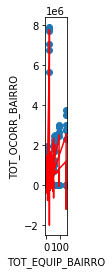

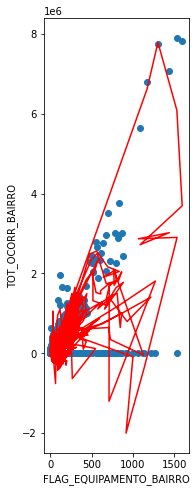

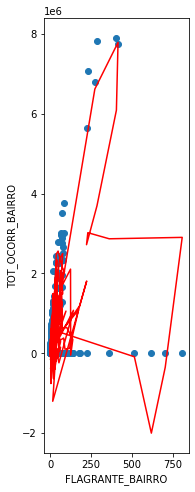

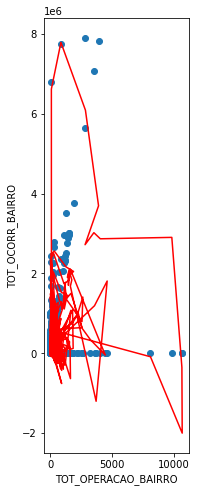

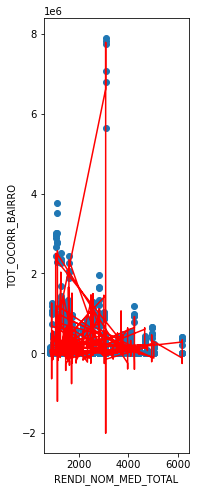

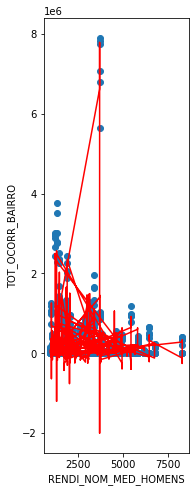

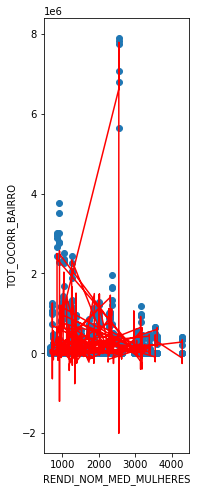

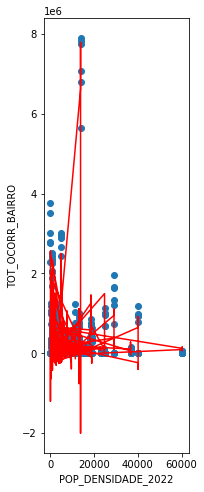

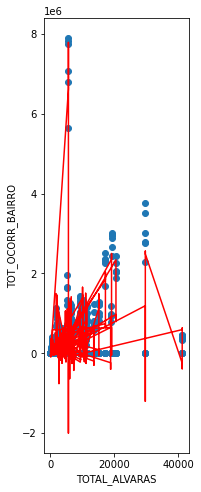

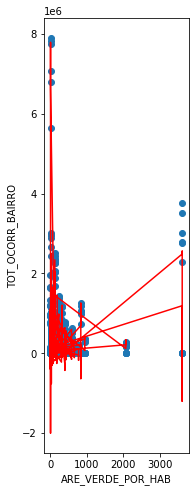

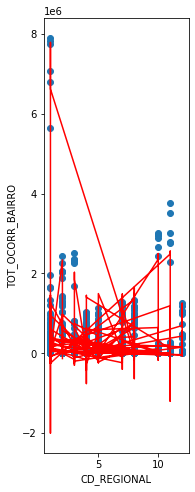

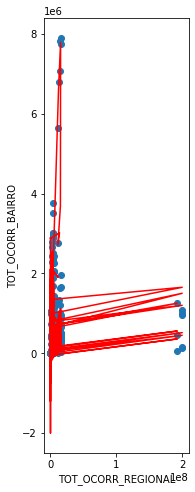

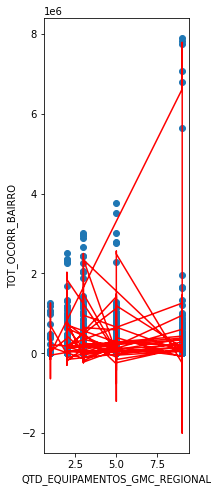

<Figure size 2880x576 with 0 Axes>

In [48]:
import matplotlib.pyplot as plt
import statsmodels.api as sm


# Plotar gráficos de dispersão com linhas de regressão
for i in range(X.shape[1]):
    plt.subplot(1, X.shape[1], i + 1)
    plt.scatter(X.iloc[:, i], y)
    plt.plot(X.iloc[:, i], modelo.predict(X), color='red')
    plt.xlabel(X.columns[i])
    plt.ylabel('TOT_OCORR_BAIRRO')
    plt.figure(figsize=(40,8))

plt.show()


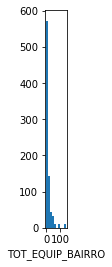

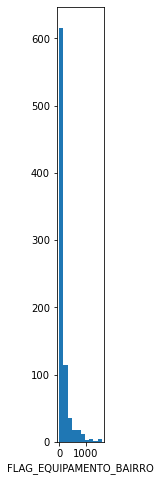

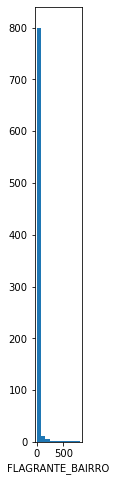

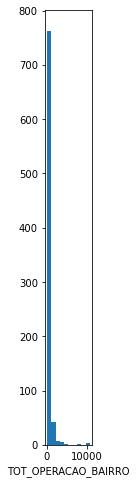

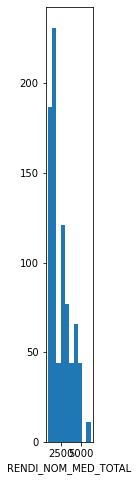

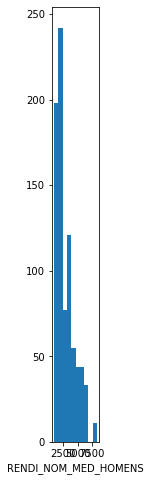

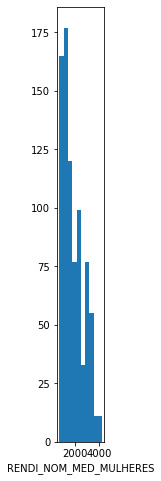

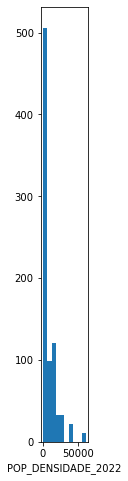

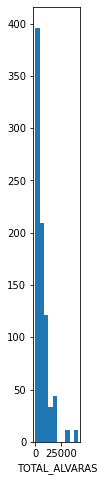

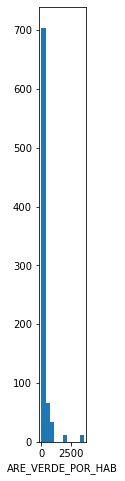

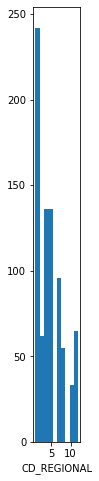

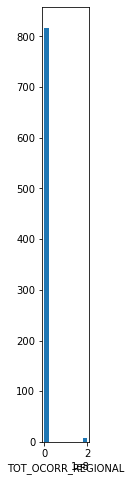

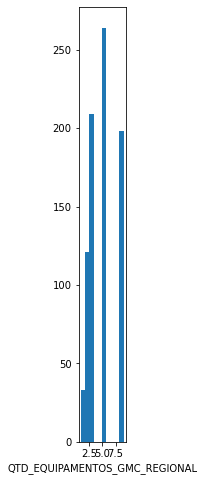

<Figure size 936x576 with 0 Axes>

In [55]:
import matplotlib.pyplot as plt

# Criar um histograma para cada variável X
for i in range(X.shape[1]):
    plt.subplot(1, X.shape[1], i + 1)
    plt.hist(X.iloc[:, i])
    plt.xlabel(X.columns[i])
    plt.figure(figsize=(13,8))

plt.show()


In [62]:
# Calcular a média de cada variável
media = np.mean(X, axis=0)
print('média de X é:', media)

# Calcular o desvio padrão de cada variável
desvio_padrao = np.std(X, axis=0)
print('Desvio padrao de X é:', desvio_padrao)


média de X é: TOT_EQUIP_BAIRRO                 1.558667e+01
FLAG_EQUIPAMENTO_BAIRRO          1.517855e+02
FLAGRANTE_BAIRRO                 1.988970e+01
TOT_OPERACAO_BAIRRO              3.834352e+02
RENDI_NOM_MED_TOTAL              2.406357e+03
RENDI_NOM_MED_HOMENS             2.959198e+03
RENDI_NOM_MED_MULHERES           1.847425e+03
POP_DENSIDADE_2022               8.302970e+03
TOTAL_ALVARAS                    6.440213e+03
ARE_VERDE_POR_HAB                2.050535e+02
CD_REGIONAL                      4.695758e+00
TOT_OCORR_REGIONAL               5.371662e+06
QTD_EQUIPAMENTOS_GMC_REGIONAL    4.853333e+00
dtype: float64
Desvio padrao de X é: TOT_EQUIP_BAIRRO                 2.170658e+01
FLAG_EQUIPAMENTO_BAIRRO          2.228624e+02
FLAGRANTE_BAIRRO                 5.767044e+01
TOT_OPERACAO_BAIRRO              8.525504e+02
RENDI_NOM_MED_TOTAL              1.222435e+03
RENDI_NOM_MED_HOMENS             1.616075e+03
RENDI_NOM_MED_MULHERES           8.727023e+02
POP_DENSIDADE_2022           

In [64]:
# Calcular o z-score de cada variável
zscores = (X - media) / desvio_padrao
print(zscores)


     TOT_EQUIP_BAIRRO  FLAG_EQUIPAMENTO_BAIRRO  FLAGRANTE_BAIRRO  \
0           -0.303441                -0.447745         -0.310206   
1           -0.303441                -0.541973         -0.292866   
2           -0.303441                -0.501589         -0.154147   
3           -0.303441                -0.488128         -0.171486   
4           -0.303441                -0.510564         -0.223506   
..                ...                      ...               ...   
820          0.802214                 0.081730         -0.240846   
821          0.802214                 0.032372         -0.154147   
822          0.802214                 0.131088          0.244671   
823          0.802214                -0.106727          0.331371   
824          0.802214                -0.111214          0.088612   

     TOT_OPERACAO_BAIRRO  RENDI_NOM_MED_TOTAL  RENDI_NOM_MED_HOMENS  \
0              -0.448578            -0.570097             -0.566984   
1              -0.429811            -0.57

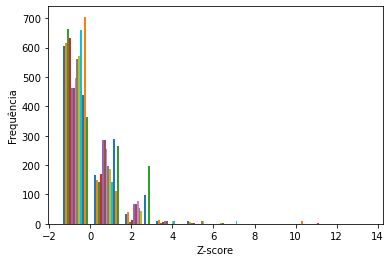

<Figure size 1440x2160 with 0 Axes>

In [73]:
# Visualizar a distribuição dos z-scores
import matplotlib.pyplot as plt

plt.hist(zscores)
plt.xlabel('Z-score')
plt.ylabel('Frequência')
plt.figure(figsize=(20,30))
plt.show()

## 7. Seleção dos Parâmetros:

## 8. Avaliação do Modelo:

## 9. Interpretação dos Resultados:

## 10. Validação do Modelo: